# Exercise 1 - pandas repetition

## 0. Working with national data

In [3]:
import pandas as pd

national_test_file_path = "data/riket2023_åk9_np.xlsx"

sheet_names = pd.ExcelFile(national_test_file_path).sheet_names # visar sheet names

df_dict = {}
for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(national_test_file_path, skiprows=8, sheet_name=sheet_name) # gör varje sheet till en dict. key blir sheet name, df blir value
df_dict.keys()


dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [4]:
df_dict["Engelska"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [5]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

## b) change name of columns

In [6]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [7]:
import numpy as np
postfixes = [""]*2 + [" (A-F)"]*3 + [" (A-E)"]*3 + [" (poäng)"]*3

np.array(postfixes) # gör det till en array, för om man adderar en array med nåt annat med lika många element, så konkateneras det på element nivå


array(['', '', ' (A-F)', ' (A-F)', ' (A-F)', ' (A-E)', ' (A-E)', ' (A-E)',
       ' (poäng)', ' (poäng)', ' (poäng)'], dtype='<U8')

In [8]:
df_dict["Engelska"].columns.str.strip() + np.array(postfixes) # postfixes listan adderas till df_dict, kolumn namnen konkateneras

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)',
       'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [9]:
from copy import deepcopy

df_dict_cleaned = deepcopy(df_dict)

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename(
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1
    )

df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [10]:
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


## C) - EDA

In [11]:
df_dict_cleaned["Matematik"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plats            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (poäng)   4 non-null      float64
 9   Flickor (poäng)  4 non-null      float64
 10  Pojkar (poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [12]:
df_dict_cleaned["Matematik"]["Totalt (A-F)"]

0    106766
1     84163
2     22553
3        50
Name: Totalt (A-F), dtype: int64

In [13]:
df_dict_cleaned["Matematik"].columns

Index(['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
       'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)',
       'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [14]:
df_dict_cleaned["Matematik"].describe().transpose() # transpose skiftar på rader och kolumner

,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt (poäng),4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor (poäng),4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar (poäng),4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [15]:
df_dict_cleaned["Matematik"][["Huvudman","Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


## D) Amount of students that got F in math

In [16]:
# totalt (A-F) - all students in a Huvudman
# totalt (A-E) - % students that have passed in a Huvudman

# pick huvudman Samtliga

df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [17]:
import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga' 
"""
).df().values[0][0]

total_students

np.int64(106766)

In [18]:
students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students

students_passed

0    95128.506
Name: Totalt (A-E), dtype: object

In [19]:
students_failed = total_students - students_passed
students_failed[0]

11637.493999999992

## E) bar chart on total points for each subject

In [20]:
total_points = {}
# {
# Engelska : ..., Matte: ..., Svenska: ...
# }

# matplotlib bar plot, x = keys, height = points


df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0] # Ger genomsnittsvärdet (poäng) för Engelska

np.float64(15.7)

In [21]:
for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")[
        "Totalt (poäng)"
    ][0]

total_points
    

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

['Engelska', 'Matematik', 'Svenska', 'SvA']


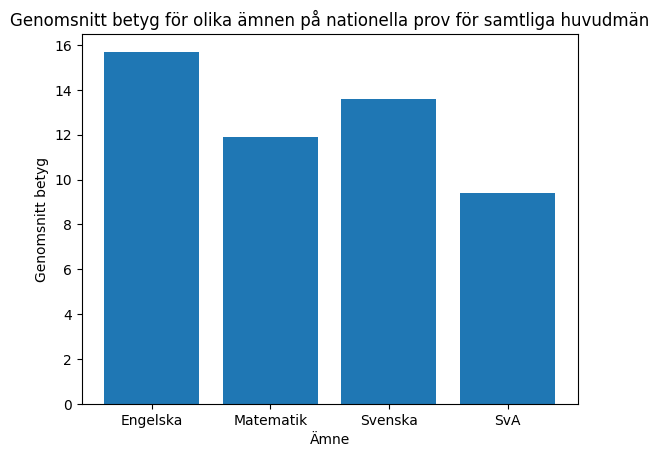

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(x=total_points.keys(), height=total_points.values())
ax.set(
    xlabel="Ämne",
    ylabel="Genomsnitt betyg",
    title="Genomsnitt betyg för olika ämnen på nationella prov för samtliga huvudmän",
)

subjects[-1] = "SvA"
print(subjects)
ax.set_xticks(labels=subjects, ticks=range(len(subjects)))

## 1 a) Draw a line chart for proportion of students that are missing approved grade for one or more subjects for the years 18-23.

In [68]:
df = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows= 6)
df = df.drop(0)
print(df.columns)
# df1a= df.head(6)
# print(df1a)
# df1a
# df1a.drop(0)
# df1a.head()

Index(['Unnamed: 0', 'Genomsnittligt meritvärde beräknat på 16 ämnen',
       'Unnamed: 2', 'Unnamed: 3',
       'Genomsnittligt meritvärde beräknat på 17 ämnen3', 'Unnamed: 5',
       'Unnamed: 6',
       'Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen',
       'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [70]:
df.head(5)

,Unnamed: 0,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,"Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen",Unnamed: 8,Unnamed: 9
1,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
2,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
3,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
4,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
5,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


In [75]:
df = df.rename(columns={"Unnamed: 0": "Studie år"})
df

,Studie år,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,"Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen",Unnamed: 8,Unnamed: 9
1,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
2,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
3,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
4,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
5,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28
6,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
8,Enskild,237.9,245,230.8,247.2,254.8,239.7,18.7,18.4,19
9,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18,17.7,18.3


In [79]:
df = df[["Studie år", "Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen"]]
df = df.head()
df

,Studie år,"Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen"
0,2018/19,24.5
1,2019/20,23.9
2,2020/21,23.9
3,2021/22,25.9
4,2022/23,26.8


In [81]:
year = df["Studie år"]
not_passed = df["Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen"]

[Text(0.5, 0, 'Läsår'),
 Text(0, 0.5, 'Antal ej godkända'),
 Text(0.5, 1.0, 'Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen')]

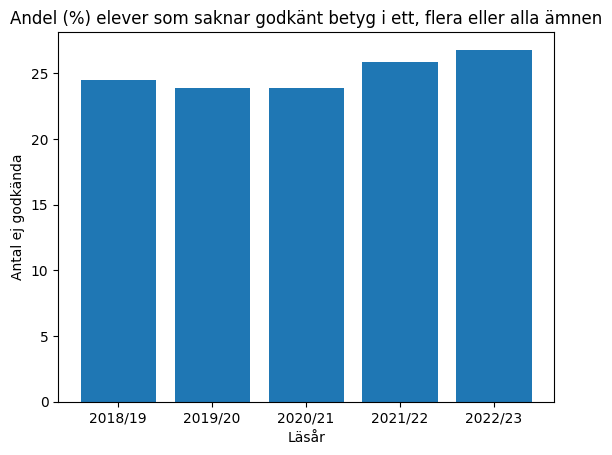

In [82]:
fig, ax = plt.subplots(1)

ax.bar(x=year, height=not_passed)
ax.set(
    xlabel="Läsår",
    ylabel="Antal ej godkända",
    title="Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen",
)


# ax.set_xticks(labels=subjects, ticks=range(len(subjects)))

## b) Examine other variable(s) of your choice and check how they affect the students grade. For example you could choose "föräldrarnas utbildningsbakgrund", parents grades.

In [88]:
df = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows= 6)
df = df.rename(columns={"Unnamed: 0": "Studie år"})
df = df.set_index("Studie år")
df

,Genomsnittligt meritvärde beräknat på 16 ämnen,Unnamed: 2,Unnamed: 3,Genomsnittligt meritvärde beräknat på 17 ämnen3,Unnamed: 5,Unnamed: 6,"Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen",Unnamed: 8,Unnamed: 9
Studie år,,,,,,,,,
NaN,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28
därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
Enskild,237.9,245,230.8,247.2,254.8,239.7,18.7,18.4,19


In [93]:
svennebananer = df.loc["Elever med svensk bakgrund"]
svennebananer = svennebananer["Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen"]
svennebananer

21.4

# 2. Olympic games data

In [133]:
df = pd.read_csv("data/athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [113]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [134]:
stockholm = df[df['City'] == 'Stockholm']

In [121]:
stockholm

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
107,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",NaN
108,39,Lars Thorlaksn Aas,M,33.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Individual",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270752,135406,Bla Zulawszky,M,42.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",NaN
270753,135406,Bla Zulawszky,M,42.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Sabre, Individual",NaN
270897,135474,Albert Hermann Zrner,M,22.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Springboard,NaN
270898,135474,Albert Hermann Zrner,M,22.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Platform,Silver


In [117]:
stockholm_1985_count = df[(df['City'] == 'Stockholm') & (df['Year'] == 1985)].shape[0]
print(f"Antal från Stockholm 1985: {stockholm_1985_count}")

Antal från Stockholm 1985: 0


**D)**

In [135]:
oldest_query = """
SELECT Name, Age, Sport
FROM df
WHERE Age IS NOT NULL
ORDER BY Age DESC
LIMIT 10
"""
oldest_athletes = duckdb.query(oldest_query).df()
print("\n10 äldsta atleterna:")
print(oldest_athletes)


10 äldsta atleterna:
                         Name   Age             Sport
0      John Quincy Adams Ward  97.0  Art Competitions
1               Winslow Homer  96.0  Art Competitions
2  Thomas Cowperthwait Eakins  88.0  Art Competitions
3  Thomas Cowperthwait Eakins  88.0  Art Competitions
4  Thomas Cowperthwait Eakins  88.0  Art Competitions
5       George Denholm Armour  84.0  Art Competitions
6                Louis Tauzin  81.0  Art Competitions
7        Robert Tait McKenzie  81.0  Art Competitions
8              Max Liebermann  80.0  Art Competitions
9              Max Liebermann  80.0  Art Competitions


**F)**

In [137]:
median_age_high_query = """
SELECT Sport, MEDIAN(Age) as median_age
FROM df
WHERE Age IS NOT NULL
GROUP BY Sport
ORDER BY median_age DESC
LIMIT 5
"""
highest_median_age = duckdb.query(median_age_high_query).df()
print("\n5 sporter med högst medianålder:")
print(highest_median_age)


5 sporter med högst medianålder:
              Sport  median_age
0             Roque        59.0
1  Art Competitions        45.0
2          Alpinism        38.0
3              Polo        35.0
4     Equestrianism        33.0


**F)**

In [131]:
gold_query = """
SELECT NOC, COUNT(*) as Number_of_gold_medals
FROM df
WHERE Medal = 'Gold'
GROUP BY NOC
ORDER BY Number_of_gold_medals DESC
LIMIT 10
"""

most_gold = duckdb.query(gold_query).df()
print(most_gold)

   NOC  Number_of_gold_medals
0  USA                   2638
1  URS                   1082
2  GER                    745
3  GBR                    678
4  ITA                    575
5  FRA                    501
6  SWE                    479
7  CAN                    463
8  HUN                    432
9  GDR                    397


**G)**

In [139]:
number_query = """
SELECT NOC, COUNT(*) as total_medals
FROM df
WHERE Medal IS NOT NULL
GROUP BY NOC
ORDER BY total_medals DESC
LIMIT 10
"""

most_medal = duckdb.query(number_query).df()
print(most_medal)

   NOC  total_medals
0  USA          5637
1  URS          2503
2  GER          2165
3  GBR          2068
4  FRA          1777
5  ITA          1637
6  SWE          1536
7  CAN          1352
8  AUS          1320
9  RUS          1165
